In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
# полный код из pycharm
import joblib
from typing import Any, Dict, List, Tuple, Type, Union
import numpy as np
from matplotlib import pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.utils import all_estimators
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
# Импорт метрик для оценки модели (scores)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    d2_absolute_error_score, ndcg_score, rand_score, dcg_score, fbeta_score,
    adjusted_rand_score, silhouette_score, completeness_score, homogeneity_score,
    jaccard_score, v_measure_score, brier_score_loss, d2_tweedie_score,
    cohen_kappa_score, d2_pinball_score, mutual_info_score, adjusted_mutual_info_score,
    average_precision_score, label_ranking_average_precision_score, balanced_accuracy_score,
    top_k_accuracy_score, calinski_harabasz_score, roc_auc_score
)
# Импорт метрик ошибок (errors)
from sklearn.metrics import (
    max_error, mean_absolute_percentage_error, median_absolute_error,
    mean_squared_log_error, mean_squared_error, mean_absolute_error
)
import sklearn

scores = (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    d2_absolute_error_score, ndcg_score, rand_score, dcg_score, fbeta_score,
    adjusted_rand_score, silhouette_score, completeness_score, homogeneity_score,
    jaccard_score, v_measure_score, brier_score_loss, d2_tweedie_score,
    cohen_kappa_score, d2_pinball_score, mutual_info_score, adjusted_mutual_info_score,
    average_precision_score, label_ranking_average_precision_score, balanced_accuracy_score,
    top_k_accuracy_score, calinski_harabasz_score, roc_auc_score
)

errors = (
    max_error, mean_absolute_percentage_error, median_absolute_error,
    mean_squared_log_error, mean_squared_error, mean_absolute_error
)


class Model:
    def __init__(self, model: Type[BaseEstimator] = None):
        """
        Initialize the Model instance.

        Parameters:
        model (Type[BaseEstimator], optional): The model to use. Defaults to None.
        """
        all_models = self.check_model_type()

        if model:
            assert isinstance(model, tuple(all_models)), ('Incorrect input model type. '
                                                          f'Should be one of {type(self)} models from sklearn')
        self.__model: BaseEstimator = model

    @property
    def model(self):
        return self.__model

    def check_model_type(self) -> List[Type[BaseEstimator]]:
        self.__model_types_with_names: List[Tuple[str, Type[BaseEstimator]]] = all_estimators(
            type_filter=type(self).__name__.lower())
        all_models = [t[1] for t in self.__model_types_with_names]
        return all_models

    def fit(self, X: Any, y: Any = None, *args: Any, **kwargs: Any) -> None:
        """
        Fit the model to the data.

        Parameters:
        X (Any): Training data.
        y (Any, optional): Target values.
        *args (Any): Variable length argument list.
        **kwargs (Any): Arbitrary keyword arguments.
        """
        assert self.__model is not None, "Model is not defined."
        self.__model.fit(X, y, *args, **kwargs)

    def predict(self, X: Any, *args: Any, **kwargs: Any) -> Any:
        """
        Predict using the model.

        Parameters:
        X (Any): Data to predict.
        *args (Any): Variable length argument list.
        **kwargs (Any): Arbitrary keyword arguments.

        Returns:
        Any: Predicted values.
        """
        assert self.__model is not None, "Model is not defined."
        return self.__model.predict(X, *args, **kwargs)

    def predict_proba(self, X: Any, *args: Any, **kwargs: Any) -> Any:
        """
        Predict class probabilities using the model.

        Parameters:
        X (Any): Data to predict.
        *args (Any): Variable length argument list.
        **kwargs (Any): Arbitrary keyword arguments.

        Returns:
        Any: Predicted class probabilities.
        """
        classifier_models = [t[1] for t in all_estimators(type_filter='classifier')]
        assert isinstance(self.__model, tuple(classifier_models)), ('Incorrect model type for predict_proba. '
                                                                   f'Should be one of {classifier_models}')
        return self.__model.predict_proba(X, *args, **kwargs)

    def save_model(self, path: str, *args: Any, **kwargs: Any) -> None:
        """
        Save the model to a file.

        Parameters:
        path (str): The path to save the model.
        *args (Any): Variable length argument list.
        **kwargs (Any): Arbitrary keyword arguments.
        """
        assert self.__model is not None, "Model is not defined."
        joblib.dump(self, path, *args, **kwargs)  # Сохраняем текущий объект Model

    @classmethod
    def load_model(cls, path: str, *args: Any, **kwargs: Any) -> 'Model':
        """
        Load a model from a file.

        Parameters:
        path (str): The path to load the model from.
        *args (Any): Variable length argument list.
        **kwargs (Any): Arbitrary keyword arguments.

        Returns:
        Model: An instance of the Model class with the loaded model.
        """
        try:
            model_instance = joblib.load(path, *args, **kwargs)
            assert isinstance(model_instance, cls), "Loaded object is not an instance of the expected class."
            return model_instance
        except:
            raise ValueError("You're tying to load incorrect model")

    def fit_all(self, X: Any, y: Any = None, *args: Any, **kwargs: Any) -> Tuple[Dict[str, 'Model'], Dict[str, Exception]]:
        """
        Fit all available models to the data.

        Parameters:
        X (Any): Training data.
        y (Any, optional): Target values.
        *args (Any): Variable length argument list.
        **kwargs (Any): Arbitrary keyword arguments.

        Returns:
        Tuple[Dict[str, Model], Dict[str, Exception]]: A tuple containing a dictionary of fitted models and a dictionary of errors.
        """
        fitted_models: Dict[str, 'Model'] = {}
        error_fitting: Dict[str, Exception] = {}

        for model_name, model_type in self.__model_types_with_names:
            try:
                model_instance = model_type()
                model_instance.fit(X, y, *args, **kwargs)
                wrapped_model = self.__class__(model_instance)
                fitted_models[model_name] = wrapped_model
            except Exception as e:
                error_fitting[model_name] = e

        return fitted_models, error_fitting

    def get_params(self, *args: Any, **kwargs: Any) -> Dict[str, Any]:
        """
        Get parameters of the model.

        Parameters:
        *args (Any): Variable length argument list.
        **kwargs (Any): Arbitrary keyword arguments.

        Returns:
        Dict[str, Any]: Model parameters.
        """
        assert self.__model is not None, "Model is not defined."
        return self.__model.get_params(*args, **kwargs)

class Cluster(Model):
    def __init__(self, model: Type[BaseEstimator] = None) -> None:
        """
        Initialize the Cluster instance.

        Parameters:
        model (Type[BaseEstimator], optional): The model to use. Defaults to None.
        """
        super().__init__(model)

    def elbow_method(self, x_train: Any, max_k: int) -> List[float]:
        """
        Apply the elbow method to determine the optimal number of clusters.

        Parameters:
        x_train (array-like): Training data.
        max_k (int): Maximum number of clusters to consider.

        Returns:
        list: WCSS (within-cluster sum of squares) for each number of clusters.
        """
        assert isinstance(max_k, int), f'Incorrect max_k param type. {type(max_k)} instead of {int}'

        wcss = []
        for k in range(1, max_k + 1):
            self.model.n_clusters = k
            model = self.model.fit(x_train)
            wcss.append(model.inertia_)

        return wcss

    def elbow_method_plot(self, wcss: Union[List[float], Tuple[float, ...]]) -> None:
        """
        Plot the results of the elbow method.

        Parameters:
        wcss (list or tuple): WCSS values for different numbers of clusters.

        Returns:
        None
        """
        assert isinstance(wcss, (list, tuple)), f'Incorrect wcss param type. {type(wcss)} instead of {list | tuple}'

        plt.figure(figsize=(10, 6))
        plt.grid(True)
        plt.plot(range(1, len(wcss) + 1), wcss, marker='o', mfc='red')
        plt.title('Selecting the number of clusters using the elbow method')
        plt.xlabel('num clusters')
        plt.ylabel('WCSS (error)')
        plt.xticks(range(1, len(wcss) + 1))
        plt.show()

    def elbow_method_best_k(self, wcss: Union[List[float], Tuple[float, ...]], threshold: int) -> Union[int, str]:
        """
        Determine the best number of clusters using the elbow method with a given threshold.

        Parameters:
        wcss (list or tuple): WCSS values for different numbers of clusters.
        threshold (int): Threshold for the elbow method.

        Returns:
        int: Optimal number of clusters or an error message if not found.
        """
        assert isinstance(wcss, (list, tuple)), f'Incorrect wcss param type. {type(wcss)} instead of {list | tuple}'
        assert isinstance(threshold, int), f'Incorrect threshold param type. {type(threshold)} instead of {int}'

        prev = wcss[0]
        for i, cur in enumerate(wcss[1:]):
            if prev - cur <= threshold:
                return i + 1
            prev = cur
        return 'It is impossible to find the optimal number of clusters with a given threshold'


# кластеризация

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
x_train, x_test = df.iloc[:110, :], df.iloc[110:, :]

In [5]:
model = Cluster()
model.fit_all(x_test)

({'AffinityPropagation': <__main__.Cluster at 0x1d4af601a50>,
  'AgglomerativeClustering': <__main__.Cluster at 0x1d4af6948d0>,
  'Birch': <__main__.Cluster at 0x1d4b04c4510>,
  'BisectingKMeans': <__main__.Cluster at 0x1d4b040aed0>,
  'DBSCAN': <__main__.Cluster at 0x1d4b0188650>,
  'FeatureAgglomeration': <__main__.Cluster at 0x1d4b0538650>,
  'HDBSCAN': <__main__.Cluster at 0x1d4b0387910>,
  'KMeans': <__main__.Cluster at 0x1d4b03ba150>,
  'MeanShift': <__main__.Cluster at 0x1d4b03fe790>,
  'MiniBatchKMeans': <__main__.Cluster at 0x1d4b0525fd0>,
  'OPTICS': <__main__.Cluster at 0x1d4b0538810>,
  'SpectralClustering': <__main__.Cluster at 0x1d4af5eb610>},
 {})

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = Cluster(KMeans())

In [8]:
wcss = model.elbow_method(x_train, 20)

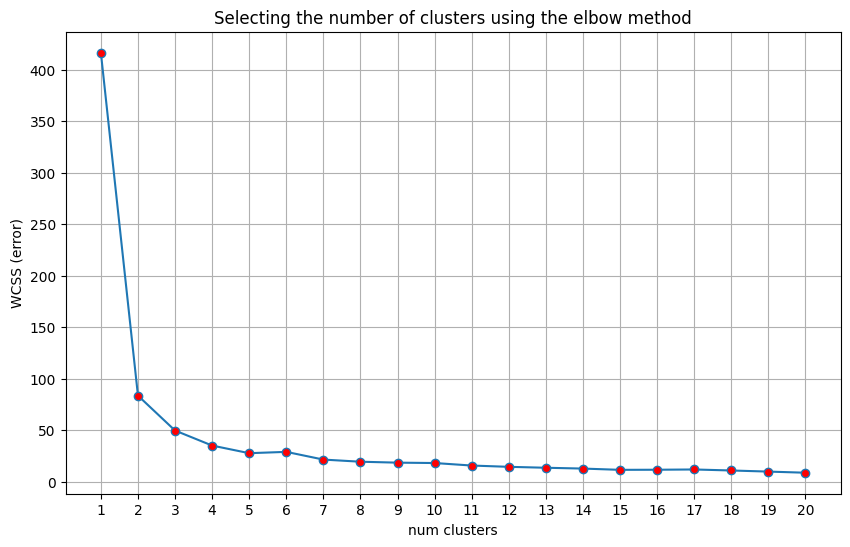

In [9]:
model.elbow_method_plot(wcss)

In [10]:
optimal_k = model.elbow_method_best_k(wcss, 15)
optimal_k

3

# Рекоммендательная система

In [11]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cityblock, cosine, euclidean, hamming, jaccard
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv("C:\ML\DataBases\movies_metadata.csv")
data.head(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13248\596126947.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\ML\DataBases\movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [14]:
data.shape

(45466, 24)

In [15]:
data.fillna(0, inplace=True)

In [16]:
movies = pd.read_csv('c:\\ML\\DataBases\\movies.csv')
ratings = pd.read_csv('c:\\ML\\DataBases\\ratings.csv')

In [17]:
movies.drop(['genres', 'title'], inplace=True, axis=1)
ratings.drop('timestamp', inplace=True, axis=1)

In [18]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [19]:
# РАБОЧИЙ КЛАСС

class RecommendSystem:
    def __init__(self, based_on=None):
        self.__based_on = based_on

    def fit(self, X, y, **kwargs):
        # Объединяем данные X и y
        df = pd.concat([X, y], axis=1)
        
        weighted_avg = df.groupby(df.columns[-1]).apply(lambda g: g.iloc[:, :-1].multiply(len(g), axis=0).sum() / len(g))

        self.df = weighted_avg


        # Инициализация модели NearestNeighbors с заданными параметрами
        self.__model = NearestNeighbors(
            n_neighbors=kwargs.get('n_neighbors', self.df.shape[0]),
            radius=kwargs.get('radius', 1.0),
            algorithm="auto",
            leaf_size=30,
            metric=kwargs.get('metric', "minkowski"),
            p=2,
            metric_params=None,
            n_jobs=None
        )

        # Обучение модели
        self.__model.fit(self.df)

    def predict(self, x, **kwargs):
        # Проверка, является ли x DataFrame
        if not isinstance(x, pd.DataFrame):
            x = pd.DataFrame([x])

        # Получение ближайших соседей
        result = self.__model.kneighbors(x, return_distance=True)
        res_recomends = []  # результирующие рекоммендации
        # добавляем рекоммендации и дистанцию от фильма по заданным параметром до рекоммендованного
        for example, dist in zip(result[1], result[0]):
            temp_df = self.df
            temp_df['recommendation'] = example
            temp_df['distance'] = dist
            temp_df.sort_values('distance', inplace=True, ascending=kwargs.get('ascending', False))
            temp_df.reset_index(inplace=True, drop=True)
            # добавляем каждому набору признаков свои рекоммендации
            res_recomends.append(temp_df)
        return res_recomends
    
    def levenshtein_distance(self, s1, s2):
        len_s1 = len(s1)
        len_s2 = len(s2)

        # Создаем матрицу размером (len_s1 + 1) x (len_s2 + 1)
        dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

        # Инициализируем первую строку и первый столбец
        for i in range(len_s1 + 1):
            dp[i][0] = i

        for j in range(len_s2 + 1):
            dp[0][j] = j

        # Заполняем матрицу
        for i in range(1, len_s1 + 1):
            for j in range(1, len_s2 + 1):
                cost = 0 if s1[i - 1] == s2[j - 1] else 1
                dp[i][j] = min(dp[i - 1][j] + 1,  # Удаление
                            dp[i][j - 1] + 1,  # Вставка
                            dp[i - 1][j - 1] + cost)  # Замена или совпадение

        return dp[len_s1][len_s2]

    def report(self, y_true, y_pred):
        # сделать через KN, каждый раз 
        # добавляет все метрики 
        metrics = {}
        recommendation_metrics.append(self.levenshtein_distance)
        for metric in recommendation_metrics:
            try:
                metrics[metric.__name__] = metric(y_true, y_pred)
            except Exception as e:
                print(f"Error calculating {metric.__name__}: {e}")
        return metrics


In [20]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from Levenshtein import distance as lev_dist

In [21]:
# КЛАСС ДЛЯ ТЕСТОВ ИЗМЕНЕНИЙ

class RecommendSystem:
    def __init__(self, based_on=None):
        self.__based_on = based_on

    def fit(self, X, y, **kwargs):
        # Объединяем данные X и y
        df = pd.concat([X, y], axis=1)
        
        weighted_avg = df.groupby(df.columns[-1]).apply(lambda g: g.iloc[:, :-1].multiply(len(g), axis=0).sum() / len(g))

        self.df = weighted_avg


        # Инициализация модели NearestNeighbors с заданными параметрами
        self.__model = NearestNeighbors(
            n_neighbors=kwargs.get('n_neighbors', self.df.shape[0]),
            radius=kwargs.get('radius', 1.0),
            algorithm="auto",
            leaf_size=30,
            metric=kwargs.get('metric', "minkowski"),
            p=2,
            metric_params=None,
            n_jobs=None
        )

        # Обучение модели
        self.__model.fit(self.df)

    def predict(self, x, **kwargs):
        # Проверка, является ли x DataFrame
        if not isinstance(x, pd.DataFrame):
            x = pd.DataFrame([x])

        # Получение ближайших соседей
        result = self.__model.kneighbors(x, return_distance=True)
        res_recomends = []  # результирующие рекоммендации
        # добавляем рекоммендации и дистанцию от фильма по заданным параметром до рекоммендованного
        for example, dist in zip(result[1], result[0]):
            temp_df = self.df.copy()
            temp_df['recommendation'] = example
            temp_df['distance'] = dist
            temp_df.sort_values('distance', inplace=True, ascending=kwargs.get('ascending', False))
            temp_df.reset_index(inplace=True, drop=True)
            # добавляем каждому набору признаков свои рекоммендации
            res_recomends.append(temp_df)
        return res_recomends
    
    def levenshtein_distance_handmade(self, s1, s2):
        len_s1 = len(s1)
        len_s2 = len(s2)

        # Создаем матрицу размером (len_s1 + 1) x (len_s2 + 1)
        dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

        # Инициализируем первую строку и первый столбец
        for i in range(len_s1 + 1):
            dp[i][0] = i

        for j in range(len_s2 + 1):
            dp[0][j] = j

        # Заполняем матрицу
        for i in range(1, len_s1 + 1):
            for j in range(1, len_s2 + 1):
                cost = 0 if s1[i - 1] == s2[j - 1] else 1
                dp[i][j] = min(dp[i - 1][j] + 1,  # Удаление
                            dp[i][j - 1] + 1,  # Вставка
                            dp[i - 1][j - 1] + cost)  # Замена или совпадение

        return dp[len_s1][len_s2]

    def report(self, x, **kwargs):
        if not isinstance(x, pd.DataFrame):
            x = pd.DataFrame([x])

        recommendation_metrics = ['minkowski', 'cityblock', 'cosine', 'euclidean', 'haversine', 
                                  'l1', 'l2', 'manhattan', 'nan_euclidean', lev_dist]
        temp_df = self.df.copy()
        for metric in recommendation_metrics:
            model = NearestNeighbors(
            n_neighbors=kwargs.get('n_neighbors', self.df.shape[0]),
            radius=kwargs.get('radius', 1.0),
            algorithm="auto",
            leaf_size=30,
            metric=metric,
            p=2,
            metric_params=None,
            n_jobs=None
                )
            model.fit(self.df)
            result = model.kneighbors(x, return_distance=True)
            name_metric = f'distance_{metric}' if metric != recommendation_metrics[-1] else f'distance_levenshtein'
            temp_df[name_metric] = result[0][0]
        temp_df.sort_values(f"distance_{kwargs.get('sort_by', 'minkowski')}", inplace=True, ascending=kwargs.get('ascending', False))
        temp_df.reset_index(inplace=True, drop=True)
        return temp_df


In [22]:
# КЛАСС С ОПИСАНИЕМ

class RecommendSystem:
    def __init__(self, based_on=None):
        """
        Constructor to initialize the RecommendSystem class.
        
        Parameters:
        based_on (optional): An optional parameter that can be used to customize the initialization.
        """
        self.__based_on = based_on

    def fit(self, X, y, **kwargs):
        """
        Fit the recommendation model with provided data.
        
        Parameters:
        X (DataFrame): Feature matrix.
        y (Series): Target vector.
        **kwargs: Additional keyword arguments for configuring the NearestNeighbors model, such as:
            - n_neighbors (int): Number of neighbors to use. Default is the number of rows in the weighted average DataFrame.
            - radius (float): Range of parameter space to use by default for neighbors search. Default is 1.0.
            - metric (str): Metric to use for distance computation. Default is "minkowski".
        
        Returns:
        None: This method does not return any value. It fits the model with the provided data.
        """
        df = pd.concat([X, y], axis=1)
        weighted_avg = df.groupby(df.columns[-1]).apply(lambda g: g.iloc[:, :-1].multiply(len(g), axis=0).sum() / len(g))
        self.df = weighted_avg

        self.__model = NearestNeighbors(
            n_neighbors=kwargs.get('n_neighbors', self.df.shape[0]),
            radius=kwargs.get('radius', 1.0),
            algorithm="auto",
            leaf_size=30,
            metric=kwargs.get('metric', "minkowski"),
            p=2,
            metric_params=None,
            n_jobs=None
        )
        self.__model.fit(self.df)

    def predict(self, x, **kwargs):
        """
        Predict recommendations for the given input.
        
        Parameters:
        x (DataFrame or list): Input data for which recommendations are to be made. If a list is provided, it will be converted to a DataFrame.
        **kwargs: Additional keyword arguments for configuring the prediction, such as:
            - ascending (bool): Whether to sort the distances in ascending order. Default is False.
        
        Returns:
        list of DataFrames: Each DataFrame contains the recommendations and distances for the corresponding input.
        """
        # Проверка, является ли x DataFrame
        if not isinstance(x, pd.DataFrame):
            x = pd.DataFrame([x])

        # Получение ближайших соседей
        result = self.__model.kneighbors(x, return_distance=True)
        res_recomends = []  # результирующие рекоммендации
        # добавляем рекоммендации и дистанцию от фильма по заданным параметром до рекоммендованного
        for example, dist in zip(result[1], result[0]):
            temp_df = self.df.copy()
            temp_df['recommendation'] = example
            temp_df['distance'] = dist
            temp_df.sort_values('distance', inplace=True, ascending=kwargs.get('ascending', False))
            temp_df.reset_index(inplace=True, drop=True)
            # добавляем каждому набору признаков свои рекоммендации
            res_recomends.append(temp_df)
        return res_recomends
    
    def levenshtein_distance_handmade(self, s1, s2):
        """
        Calculate the Levenshtein distance between two strings.
        
        Parameters:
        s1 (str): First string.
        s2 (str): Second string.
        
        Returns:
        int: The Levenshtein distance between the two strings.
        """
        len_s1 = len(s1)
        len_s2 = len(s2)

        # Создаем матрицу размером (len_s1 + 1) x (len_s2 + 1)
        dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

        # Инициализируем первую строку и первый столбец
        for i in range(len_s1 + 1):
            dp[i][0] = i

        for j in range(len_s2 + 1):
            dp[0][j] = j

        # Заполняем матрицу
        for i in range(1, len_s1 + 1):
            for j in range(1, len_s2 + 1):
                cost = 0 if s1[i - 1] == s2[j - 1] else 1
                dp[i][j] = min(dp[i - 1][j] + 1,  # Удаление
                            dp[i][j - 1] + 1,  # Вставка
                            dp[i - 1][j - 1] + cost)  # Замена или совпадение

        return dp[len_s1][len_s2]

    def report(self, x, **kwargs):
        """
        Generate a report of recommendations using various distance metrics.
        
        Parameters:
        x (DataFrame or list): Input data for which the report is to be generated. If a list is provided, it will be converted to a DataFrame.
        **kwargs: Additional keyword arguments for configuring the report, such as:
            - n_neighbors (int): Number of neighbors to use. Default is the number of rows in the weighted average DataFrame.
            - radius (float): Range of parameter space to use by default for neighbors search. Default is 1.0.
            - sort_by (str): The distance metric to sort the recommendations by. Default is 'minkowski'.
            - ascending (bool): Whether to sort the distances in ascending order. Default is False.
        
        Returns:
        DataFrame: A DataFrame containing the recommendations and distances for the given input, sorted by the specified metric.
        """
        if not isinstance(x, pd.DataFrame):
            x = pd.DataFrame([x])

        recommendation_metrics = ['minkowski', 'cityblock', 'cosine', 'euclidean', 'haversine', 
                                  'l1', 'l2', 'manhattan', 'nan_euclidean', lev_dist]
        temp_df = self.df.copy()
        for metric in recommendation_metrics:
            model = NearestNeighbors(
            n_neighbors=kwargs.get('n_neighbors', self.df.shape[0]),
            n_neighbors=kwargs.get('n_neighbors', self.df.shape[0]),
            radius=kwargs.get('radius', 1.0),
            algorithm="auto",
            leaf_size=30,
            metric=metric,
            p=2,
            metric_params=None,
            n_jobs=None
                )
            model.fit(self.df)
            result = model.kneighbors(x, return_distance=True)
            name_metric = f'distance_{metric}' if metric != recommendation_metrics[-1] else f'distance_levenshtein'
            temp_df[name_metric] = result[0][0]
        temp_df.sort_values(f"distance_{kwargs.get('sort_by', 'minkowski')}", inplace=True, ascending=kwargs.get('ascending', False))
        temp_df.reset_index(inplace=True, drop=True)
        return temp_df


In [23]:
X = data.drop('original_title', axis=1)
y = data['original_title']

In [24]:
X = ratings.drop('movieId', axis=1)
y = ratings['movieId']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1)

In [26]:
s = RecommendSystem()
s.fit(x_train, y_train, metric='cosine')

In [27]:
s.report(x_test, sort_by='cosine')

,userId,rating,distance_minkowski,distance_cityblock,distance_cosine,distance_euclidean,distance_haversine,distance_l1,distance_l2,distance_manhattan,distance_nan_euclidean,distance_levenshtein
0,331.0,4.0,101118.213523,102474.0,7.399320e-01,101118.213523,3.141563,102474.0,101118.213523,102474.0,101118.213523,2.0
1,184.0,3.5,95563.240893,96952.0,6.118528e-01,95563.240893,3.115038,96952.0,95563.240893,96952.0,95563.240893,2.0
2,184.0,3.5,90354.116659,91628.5,4.700569e-01,90354.116659,3.090043,91628.5,90354.116659,91628.5,90354.116659,2.0
3,184.0,3.5,85266.836560,86415.0,4.700569e-01,85266.836560,3.088575,86415.0,85266.836560,86415.0,85266.836560,2.0
4,184.0,4.0,84967.925479,86120.5,4.303199e-01,84967.925479,3.087031,86120.5,84967.925479,86120.5,84967.925479,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9719,14679.0,150.5,1.000000,1.0,1.343021e-10,1.000000,0.053048,1.0,1.000000,1.0,1.000000,1.0
9720,14747.0,169.5,1.000000,1.0,1.343021e-10,1.000000,0.022259,1.0,1.000000,1.0,1.000000,1.0
9721,1539.0,16.5,1.000000,1.0,1.343021e-10,1.000000,0.039127,1.0,1.000000,1.0,1.000000,1.0
9722,36251.0,377.5,1.000000,1.0,5.089540e-11,1.000000,0.015867,1.0,1.000000,1.0,1.000000,1.0


In [28]:
pred = s.predict(x_test)
print(pred)

[       userId  rating  recommendation      distance
0       331.0     4.0            1125  7.399320e-01
1       184.0     3.5            8810  6.118528e-01
2       184.0     3.5            4588  4.700569e-01
3       184.0     3.5            4039  4.700569e-01
4       184.0     4.0            5042  4.303199e-01
...       ...     ...             ...           ...
9719  14679.0   150.5            5786  1.343021e-10
9720  14747.0   169.5            5775  1.343021e-10
9721   1539.0    16.5            5397  1.343021e-10
9722  36251.0   377.5            7200  5.089540e-11
9723  65904.0   843.0            8531  1.626743e-11

[9724 rows x 4 columns]]


для классификации, регрессии report(y_true, y_pred)